## Handbook of Pulsar Astronomy
Lorimer, D. R. ; Kramer, M.
https://ui.adsabs.harvard.edu/abs/2004hpa..book.....L/abstract

For time-domain studies, useful quantities are the \colorbox{yellow}{signal to noise} ratio,
$S/N$, and chi-square statistic, $\chi^{2}$, of a pulse profile $p_{i}$ with $n_{\text{bins}}$ bins
defined by:

$$
S/N=\frac{1}{\sigma_{\text{p}}\sqrt{W_{\text{eq}}}}\sum_{i = 1}^{n_{\text{bins}}}(p_{i}-\bar{p}) \quad \text{and} \quad 
\chi^{2}=\frac{1}{\sigma_{\text{p}}^{2}}\sum_{i = 1}^{n_{\text{bins}}}(p_{i}-\bar{p})^{2},
$$


where $\bar{p}$ and $\sigma_{\text{p}}$ are the off-pulse mean and standard deviation and $W_{\text{eq}}$
is the equivalent width in bins. For further details, see Section 7.1.1.

### 7.1.1.1 Signal to noise ratio (SNR)

The most commonly - used measure of profile significance is the signal to noise ratio, $S/N$, usually defined as follows:

$$
S/N=\frac{1}{\sigma_{\text{p}}\sqrt{W_{\text{eq}}}}\sum_{i = 1}^{n_{\text{bins}}}(p_{i}-\bar{p}), \quad (7.1)
$$

where $W_{\text{eq}}$ is the equivalent width (in bins) of a top - hat pulse with the same area and peak height as the observed profile. As defined in Chapter 3, $W_{\text{eq}}$ is simply the area under the observed pulse divided by its peak height. Assuming the noise distribution follows Gaussian statistics, the probability of obtaining a profile with a particular $S/N$ by chance

$$
\text{Prob}(>S/N)=\frac{1}{\sqrt{2\pi}}\int_{S/N}^{\infty}e^{-x^{2}/2}dx=\frac{1}{2}\left[1 - \text{erf}\left(\frac{S/N}{\sqrt{2}}\right)\right], \quad (7.2)
$$

where the error function $\text{erf}(x)=(2/\sqrt{\pi})\int_{0}^{x}\exp(-x^{2})dx$ can be solved numerically (see, for example, Press et al. (1992)).

##### 2025 / 04 /05 --- DejiangYin--- yin dot dj at qq dot com

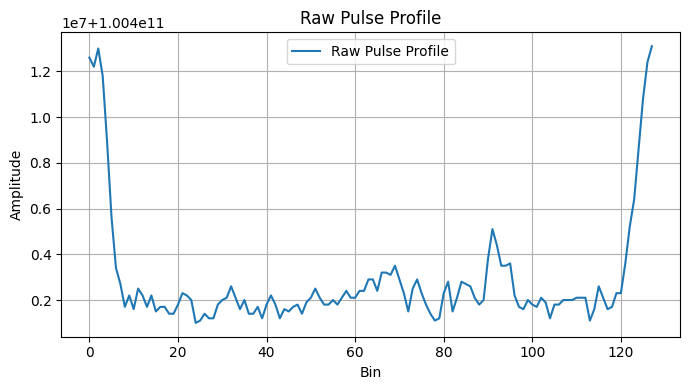

In [215]:
import numpy as np
import matplotlib.pyplot as plt
# Set the file path (replace it with your local path)
filepath = r"E:\Docker\data\timing\SNR-PRESTO-bestprof\M13_20250225_s4_1024-1363fits_DM30.80_PSR_1641+3627G.pfd.bestprof"
# Read the content of the file
with open(filepath, 'r') as f:
    lines = f.readlines()
# Extract the profile data (There are 128 lines of pulse profile data after "#####")
profile_data = []
start_reading = False
for line in lines:
    if line.strip().startswith("#####"):
        start_reading = True
        continue
    if start_reading:
        idx, val = line.strip().split()
        profile_data.append(float(val))

# Convert to a numpy array
profile = np.array(profile_data)
nbins = len(profile)
# Visualize the raw pulse profile data
plt.figure(figsize=(7, 4))
plt.plot(profile, label='Raw Pulse Profile')
plt.title("Raw Pulse Profile")
plt.xlabel("Bin")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

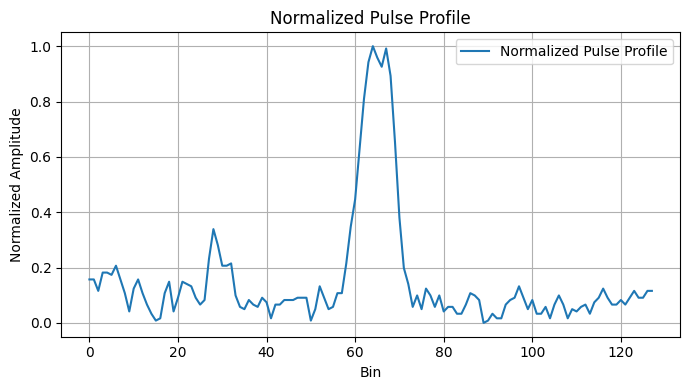

In [216]:
# Shift the peak to the center
peak_bin = np.argmax(profile)
shift = nbins // 2 - peak_bin
profile_aligned = np.roll(profile, shift)
# Simple normalization: set the minimum value to zero and normalize the maximum value to one
profile_min = np.min(profile_aligned)
profile_max = np.max(profile_aligned)
profile_normalized = (profile_aligned - profile_min) / (profile_max - profile_min)
# Visualize the normalized pulse profile
plt.figure(figsize=(7, 4))
plt.plot(profile_normalized, label='Normalized Pulse Profile')
plt.title("Normalized Pulse Profile")
plt.xlabel("Bin")
plt.ylabel("Normalized Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

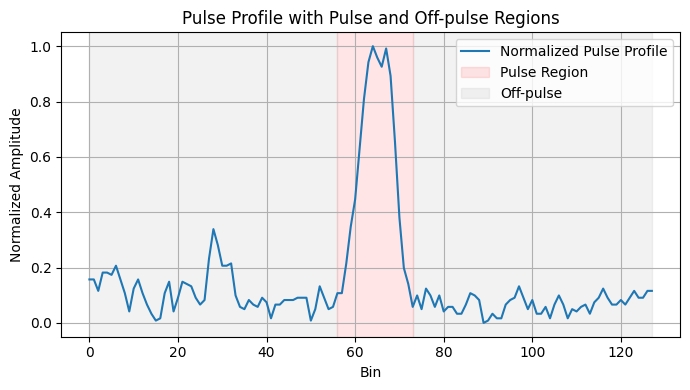

Off-pulse mean (p_off): 0.0893
Off-pulse std (σp): 0.0569


In [217]:
# Manually specify the pulse region (based on visualization experience or known parameters)
pulse_region = (56, 73)
pulse_mask = np.zeros(nbins, dtype=bool)
pulse_mask[pulse_region[0]:pulse_region[1]] = True
# The off-pulse region
off_pulse_bins = profile_normalized[~pulse_mask]
# Calculate the background mean and standard deviation
p_off = np.mean(off_pulse_bins)
sigma_p = np.std(off_pulse_bins)
# Visualize and mark the pulse region and the off-pulse region
plt.figure(figsize=(7, 4))
plt.plot(profile_normalized, label='Normalized Pulse Profile')
plt.axvspan(pulse_region[0], pulse_region[1], color='red', alpha=0.1, label='Pulse Region')
plt.axvspan(0, pulse_region[0], color='gray', alpha=0.1, label='Off-pulse')
plt.axvspan(pulse_region[1], nbins-1, color='gray', alpha=0.1)
plt.title("Pulse Profile with Pulse and Off-pulse Regions")
plt.xlabel("Bin")
plt.ylabel("Normalized Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# Output the background statistical information
print(f"Off-pulse mean (p_off): {p_off:.4f}")
print(f"Off-pulse std (σp): {sigma_p:.4f}")

Equivalent Width (Weq): 9.74 bins
S/N: 45.96


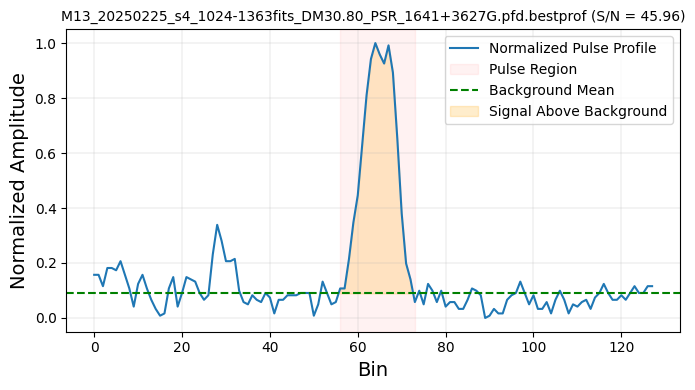

In [218]:
# Assume you already have the original profile data
# profile = np.array([...])
nbins = len(profile)
# # Shift the peak to the center
peak_bin = np.argmax(profile)
shift = nbins // 2 - peak_bin
profile_aligned = np.roll(profile, shift)
# Simple normalization: Set the minimum value to zero and the maximum value to one.
profile_min = np.min(profile_aligned)
profile_max = np.max(profile_aligned)
profile_normalized = (profile_aligned - profile_min) / (profile_max - profile_min)
# Manually specify the pulse region (based on visualization experience or known parameters)
pulse_region = (56, 73)
pulse_mask = np.zeros(nbins, dtype=bool)
pulse_mask[pulse_region[0]:pulse_region[1]+1] = True
# The off-pulse region
off_pulse_bins = profile_normalized[~pulse_mask]
# Calculate the background mean and standard deviation
p_off = np.mean(off_pulse_bins)
sigma_p = np.std(off_pulse_bins)
# Calculate the equivalent width Weq
# Calculate the area of the positive part within the pulse region
pulse_region_data = profile_normalized[pulse_region[0]:pulse_region[1]+1]
Weq = np.sum(pulse_region_data[pulse_region_data > p_off]) / np.max(pulse_region_data)
print(f"Equivalent Width (Weq): {Weq:.2f} bins")
# Calculate S/N using the provided formula
SNR = (1 / (sigma_p * np.sqrt(Weq))) * np.sum(profile_normalized[pulse_mask] - p_off)
print(f"S/N: {SNR:.2f}")
# Visualize the combined grap
plt.figure(figsize=(7, 4))
# Visualize the combined graph
plt.plot(profile_normalized, drawstyle='default', label='Normalized Pulse Profile')
# Plot the normalized pulse profile
plt.axvspan(pulse_region[0], pulse_region[1], color='red', alpha=0.05, label='Pulse Region')
#plt.axvspan(0, pulse_region[0], color='gray', alpha=0.05, label='Off-pulse')
#plt.axvspan(pulse_region[1], nbins-1, color='gray', alpha=0.05)
# Mark the background mean p_off line
plt.axhline(p_off, color='green', linestyle='--', label=f'Background Mean')
# Fill only the part within the pulse region that is above the background mean
plt.fill_between(range(pulse_region[0], pulse_region[1]+1), profile_normalized[pulse_region[0]:pulse_region[1]+1], p_off, 
                 where=(profile_normalized[pulse_region[0]:pulse_region[1]+1] > p_off), color='orange', alpha=0.2, label="Signal Above Background")
# Use the file name as the title
file_name = filepath.split('\\')[-1]  # Extract the file name from the file path
plt.title(f"{file_name} (S/N = {SNR:.2f})", fontsize=10)
plt.xlabel("Bin", fontsize=14)
plt.ylabel("Normalized Amplitude", fontsize=14)
plt.legend()
plt.grid(True,linewidth=0.2)
plt.tight_layout()
plt.show()

Total Equivalent Width (Weq): 14.65 bins
S/N: 56.40


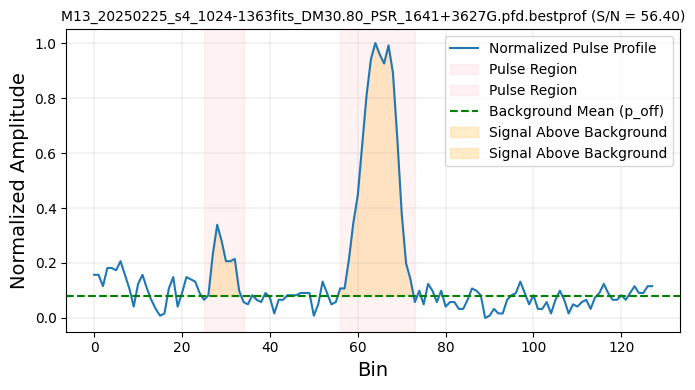

In [219]:
# Assume you already have the original profile data
# profile = np.array([...])
nbins = len(profile)
# Shift the peak to the center
peak_bin = np.argmax(profile)
shift = nbins // 2 - peak_bin
profile_aligned = np.roll(profile, shift)
# Simple normalization: Set the minimum value to zero and the maximum value to one.
profile_min = np.min(profile_aligned)
profile_max = np.max(profile_aligned)
profile_normalized = (profile_aligned - profile_min) / (profile_max - profile_min)
# Define multiple pulse regions (example)
pulse_regions = [(56, 73), (25, 34)]  # Suppose there are two pulse regions
# Create the mask for the pulse regions
pulse_mask = np.zeros(nbins, dtype=bool)
for region in pulse_regions:
    pulse_mask[region[0]:region[1]+1] = True
# The off-pulse region
off_pulse_bins = profile_normalized[~pulse_mask]
# Calculate the background mean and standard deviation (calculated together for all off-pulse regions)
p_off = np.mean(off_pulse_bins)
sigma_p = np.std(off_pulse_bins)
# Initialize the total equivalent width
total_Weq = 0
# Visualize the combined graph
plt.figure(figsize=(7, 4))
# Plot the normalized pulse profile
plt.plot(profile_normalized, drawstyle='default', label='Normalized Pulse Profile')
# Mark all the pulse regions
for region in pulse_regions:
    plt.axvspan(region[0], region[1], color='red', alpha=0.05, label='Pulse Region')
# Mark the background mean p_off line
plt.axhline(p_off, color='green', linestyle='--', label='Background Mean (p_off)')
# Calculate the Weq for each pulse region
for region in pulse_regions:
    pulse_region_data = profile_normalized[region[0]:region[1]+1]
    # Calculate the area of the positive part within the pulse region (equivalent width Weq)
    Weq = np.sum(pulse_region_data[pulse_region_data > p_off]) / np.max(pulse_region_data)
    total_Weq += Weq
    # Fill only the part within the pulse region that is above the background mean
    plt.fill_between(range(region[0], region[1]+1), profile_normalized[region[0]:region[1]+1], p_off,
                     where=(profile_normalized[region[0]:region[1]+1] > p_off), color='orange', alpha=0.2,
                     label="Signal Above Background")

print(f"Total Equivalent Width (Weq): {total_Weq:.2f} bins")
# Calculate the total SNR, based on the total equivalent width and the background mean
SNR = np.sum(profile_normalized[pulse_mask] - p_off) / (sigma_p * np.sqrt(total_Weq))
# SNR = (1 / (sigma_p * np.sqrt(total_Weq))) * np.sum(pulse_region_data - p_off)
print(f"S/N: {SNR:.2f}")
# Use the file name as the title
file_name = filepath.split('\\')[-1]  # Extract the file name from the file path
plt.title(f"{file_name} (S/N = {SNR:.2f})", fontsize=10)
plt.xlabel("Bin", fontsize=14)
plt.ylabel("Normalized Amplitude", fontsize=14)
plt.legend()
plt.grid(True, linewidth=0.2)
plt.tight_layout()
plt.show()

## Calculating for many files --single pulse

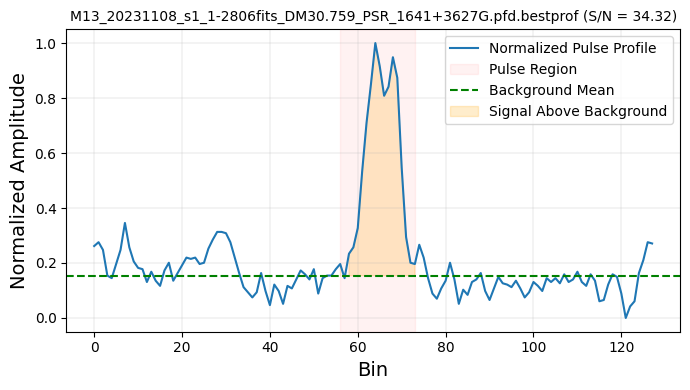

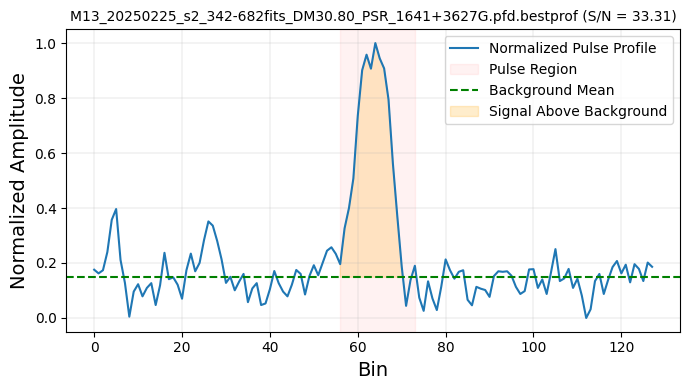

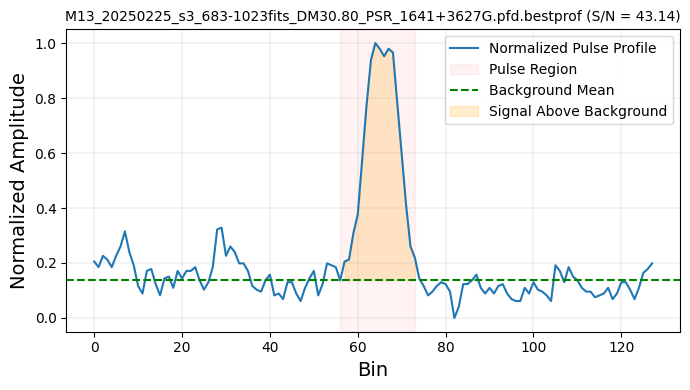

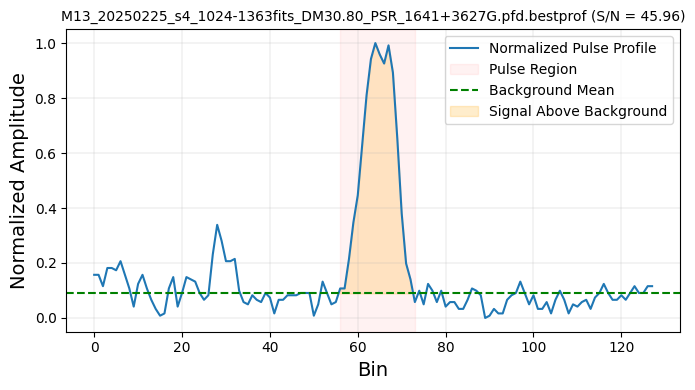

                                                           File Name        SNR
0    M13_20231108_s1_1-2806fits_DM30.759_PSR_1641+3627G.pfd.bestprof  34.316802
1    M13_20250225_s2_342-682fits_DM30.80_PSR_1641+3627G.pfd.bestprof  33.310956
2   M13_20250225_s3_683-1023fits_DM30.80_PSR_1641+3627G.pfd.bestprof  43.141836
3  M13_20250225_s4_1024-1363fits_DM30.80_PSR_1641+3627G.pfd.bestprof  45.964664


In [221]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set the file path
folder_path = r"E:\Docker\data\timing\SNR-PRESTO-bestprof"

results = {}
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.pfd.bestprof'):
            filepath = os.path.join(root, file)
            # Read the content of the file
            with open(filepath, 'r') as f:
                lines = f.readlines()
            # Extract the profile data (There are 128 lines of pulse profile data after "#####")
            profile_data = []
            start_reading = False
            for line in lines:
                if line.strip().startswith("#####"):
                    start_reading = True
                    continue
                if start_reading:
                    idx, val = line.strip().split()
                    profile_data.append(float(val))
            # Convert to a numpy array
            profile = np.array(profile_data)
            nbins = len(profile)
            # Shift the peak to the center
            peak_bin = np.argmax(profile)
            shift = nbins // 2 - peak_bin
            profile_aligned = np.roll(profile, shift)
            # Simple normalization: Set the minimum value to zero and the maximum value to one.
            profile_min = np.min(profile_aligned)
            profile_max = np.max(profile_aligned)
            profile_normalized = (profile_aligned - profile_min) / (profile_max - profile_min)
            # Manually specify the pulse region (based on visualization experience or known parameters)
            pulse_region = (56, 73)
            pulse_mask = np.zeros(nbins, dtype=bool)
            pulse_mask[pulse_region[0]:pulse_region[1]+1] = True
            # The off-pulse region
            off_pulse_bins = profile_normalized[~pulse_mask]
            # Calculate the background mean and standard deviation
            p_off = np.mean(off_pulse_bins)
            sigma_p = np.std(off_pulse_bins)
            # Calculate the equivalent width Weq
            # Calculate the area of the positive part within the pulse region
            pulse_region_data = profile_normalized[pulse_region[0]:pulse_region[1]+1]
            Weq = np.sum(pulse_region_data[pulse_region_data > p_off]) / np.max(pulse_region_data)
            # Calculate S/N using the provided formula
            SNR = (1 / (sigma_p * np.sqrt(Weq))) * np.sum(profile_normalized[pulse_mask] - p_off)
            results[file] = SNR
            # Visualize the combined graph (You can choose whether to keep the visualization part according to your needs)
            plt.figure(figsize=(7, 4))
            # Plot the normalized pulse profile
            plt.plot(profile_normalized, drawstyle='default', label='Normalized Pulse Profile')
            # Mark the pulse region and the background region
            plt.axvspan(pulse_region[0], pulse_region[1], color='red', alpha=0.05, label='Pulse Region')
            #plt.axvspan(0, pulse_region[0], color='gray', alpha=0.05, label='Off-pulse')
            #plt.axvspan(pulse_region[1], nbins-1, color='gray', alpha=0.05)
            # Mark the background mean p_off line
            plt.axhline(p_off, color='green', linestyle='--', label='Background Mean')
            # Fill only the part within the pulse region that is above the background mean
            plt.fill_between(range(pulse_region[0], pulse_region[1]+1), profile_normalized[pulse_region[0]:pulse_region[1]+1], p_off, 
                             where=(profile_normalized[pulse_region[0]:pulse_region[1]+1] > p_off), color='orange', alpha=0.2, label="Signal Above Background")
            # Use the file name as the title
            plt.title(f"{file} (S/N = {SNR:.2f})", fontsize=10)
            plt.xlabel("Bin", fontsize=14)
            plt.ylabel("Normalized Amplitude", fontsize=14)
            plt.legend()
            plt.grid(True, linewidth=0.2)
            plt.tight_layout()
            plt.show()

# Convert to DataFrame (If you need to save it in pandas)
df = pd.DataFrame(list(results.items()), columns=['File Name', 'SNR'])
print(df.to_string())

## Calculating for many files --many pulses

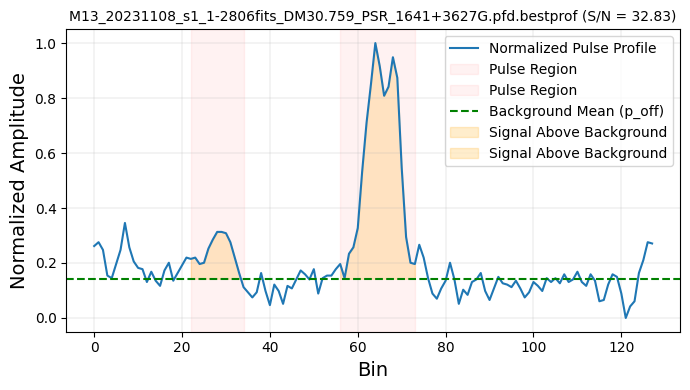

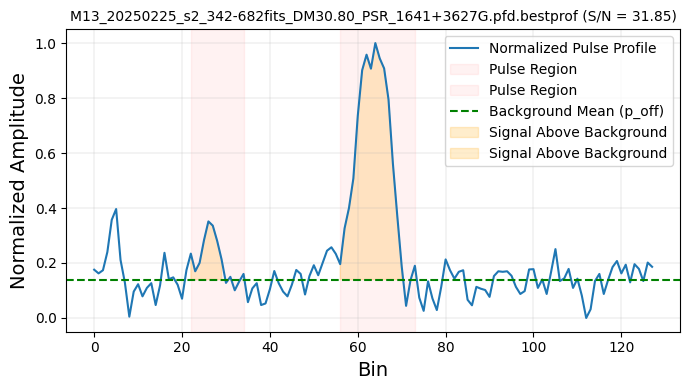

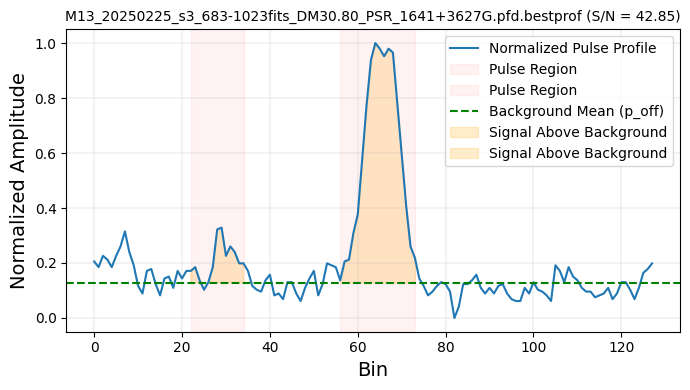

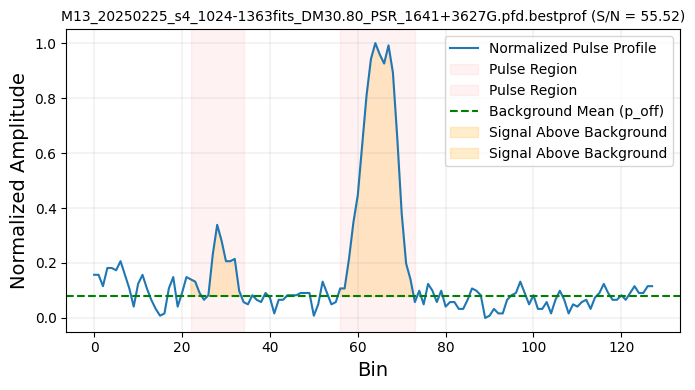

                                                           File Name        SNR
0    M13_20231108_s1_1-2806fits_DM30.759_PSR_1641+3627G.pfd.bestprof  32.826713
1    M13_20250225_s2_342-682fits_DM30.80_PSR_1641+3627G.pfd.bestprof  31.848499
2   M13_20250225_s3_683-1023fits_DM30.80_PSR_1641+3627G.pfd.bestprof  42.849817
3  M13_20250225_s4_1024-1363fits_DM30.80_PSR_1641+3627G.pfd.bestprof  55.518176


In [223]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set the folder path
folder_path = r"E:\Docker\data\timing\SNR-PRESTO-bestprof"

# Dictionary to store the results with file name as key and SNR as value
results = {}

# Walk through the directory tree
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.pfd.bestprof'):
            filepath = os.path.join(root, file)
            # Read the content of the file
            with open(filepath, 'r') as f:
                lines = f.readlines()
            # Extract the profile data (There are 128 lines of pulse profile data after "#####")
            profile_data = []
            start_reading = False
            for line in lines:
                if line.strip().startswith("#####"):
                    start_reading = True
                    continue
                if start_reading:
                    idx, val = line.strip().split()
                    profile_data.append(float(val))
            # Convert to a numpy array
            profile = np.array(profile_data)
            nbins = len(profile)
            # Shift the peak to the center
            peak_bin = np.argmax(profile)
            shift = nbins // 2 - peak_bin
            profile_aligned = np.roll(profile, shift)
            # Simple normalization: Set the minimum value to zero and the maximum value to one.
            profile_min = np.min(profile_aligned)
            profile_max = np.max(profile_aligned)
            profile_normalized = (profile_aligned - profile_min) / (profile_max - profile_min)
            # Define multiple pulse regions (example)
            pulse_regions = [(56, 73), (22, 34)]  # Suppose there are two pulse regions
            # Create the mask for the pulse regions
            pulse_mask = np.zeros(nbins, dtype=bool)
            for region in pulse_regions:
                pulse_mask[region[0]:region[1]+1] = True
            # The off-pulse region
            off_pulse_bins = profile_normalized[~pulse_mask]
            # Calculate the background mean and standard deviation (calculated together for all off-pulse regions)
            p_off = np.mean(off_pulse_bins)
            sigma_p = np.std(off_pulse_bins)
            # Initialize the total equivalent width
            total_Weq = 0
            # Calculate the Weq for each pulse region and accumulate to total_Weq
            for region in pulse_regions:
                pulse_region_data = profile_normalized[region[0]:region[1]+1]
                # Calculate the area of the positive part within the pulse region (equivalent width Weq)
                Weq = np.sum(pulse_region_data[pulse_region_data > p_off]) / np.max(pulse_region_data)
                total_Weq += Weq
            # Calculate the total SNR, based on the total equivalent width and the background mean
            SNR = np.sum(profile_normalized[pulse_mask] - p_off) / (sigma_p * np.sqrt(total_Weq))
            results[file] = SNR
            # Visualize the combined graph (You can choose whether to keep the visualization part according to your needs)
            plt.figure(figsize=(7, 4))
            # Plot the normalized pulse profile
            plt.plot(profile_normalized, drawstyle='default', label='Normalized Pulse Profile')
            # Mark all the pulse regions
            for region in pulse_regions:
                plt.axvspan(region[0], region[1], color='red', alpha=0.05, label='Pulse Region')
            # Mark the background mean p_off line
            plt.axhline(p_off, color='green', linestyle='--', label='Background Mean (p_off)')
            # Fill only the part within the pulse region that is above the background mean
            for region in pulse_regions:
                plt.fill_between(range(region[0], region[1]+1), profile_normalized[region[0]:region[1]+1], p_off,
                                 where=(profile_normalized[region[0]:region[1]+1] > p_off), color='orange', alpha=0.2,
                                 label="Signal Above Background")
            # Use the file name as the title
            plt.title(f"{file} (S/N = {SNR:.2f})", fontsize=10)
            plt.xlabel("Bin", fontsize=14)
            plt.ylabel("Normalized Amplitude", fontsize=14)
            plt.legend()
            plt.grid(True, linewidth=0.2)
            plt.tight_layout()
            plt.show()

# Convert the results dictionary to a DataFrame
df = pd.DataFrame(list(results.items()), columns=['File Name', 'SNR'])
print(df.to_string())

### Calculate for many files-adjust the Pulse range at any time

In [230]:
# Set the file path
folder_path = r"E:\Docker\data\timing\SNR-PRESTO-bestprof"
# save all files names
file_names = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.pfd.bestprof'):
            file_names.append(os.path.join(root, file))

In [231]:
file_names

['E:\\Docker\\data\\timing\\SNR-PRESTO-bestprof\\M13_20231108_s1_1-2806fits_DM30.759_PSR_1641+3627G.pfd.bestprof',
 'E:\\Docker\\data\\timing\\SNR-PRESTO-bestprof\\M13_20250225_s2_342-682fits_DM30.80_PSR_1641+3627G.pfd.bestprof',
 'E:\\Docker\\data\\timing\\SNR-PRESTO-bestprof\\M13_20250225_s3_683-1023fits_DM30.80_PSR_1641+3627G.pfd.bestprof',
 'E:\\Docker\\data\\timing\\SNR-PRESTO-bestprof\\M13_20250225_s4_1024-1363fits_DM30.80_PSR_1641+3627G.pfd.bestprof',
 'E:\\Docker\\data\\timing\\SNR-PRESTO-bestprof\\M15_20200925_PSR_2129-1210O.pfd.bestprof']

Equivalent Width (Weq): 5.43 bins
S/N: 15.65


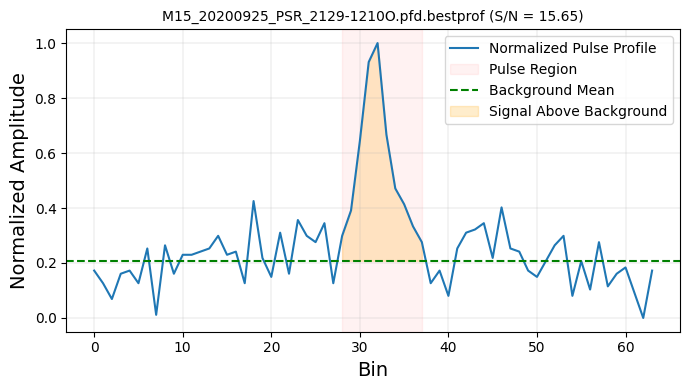

In [241]:
filepath = file_names[4]

# Read the content of the file
with open(filepath, 'r') as f:
    lines = f.readlines()
# Extract the profile data (There are 128 lines of pulse profile data after "#####")
profile_data = []
start_reading = False
for line in lines:
    if line.strip().startswith("#####"):
        start_reading = True
        continue
    if start_reading:
        idx, val = line.strip().split()
        profile_data.append(float(val))
# Convert to a numpy array
profile = np.array(profile_data)
nbins = len(profile)
# Assume you already have the original profile data
# # Shift the peak to the center
peak_bin = np.argmax(profile)
shift = nbins // 2 - peak_bin
profile_aligned = np.roll(profile, shift)
# Simple normalization: Set the minimum value to zero and the maximum value to one.
profile_min = np.min(profile_aligned)
profile_max = np.max(profile_aligned)
profile_normalized = (profile_aligned - profile_min) / (profile_max - profile_min)

# Manually specify the pulse region (based on visualization experience or known parameters)
pulse_region = (28, 37)

pulse_mask = np.zeros(nbins, dtype=bool)
pulse_mask[pulse_region[0]:pulse_region[1]+1] = True
# The off-pulse region
off_pulse_bins = profile_normalized[~pulse_mask]
# Calculate the background mean and standard deviation
p_off = np.mean(off_pulse_bins)
sigma_p = np.std(off_pulse_bins)
# Calculate the equivalent width Weq
# Calculate the area of the positive part within the pulse region
pulse_region_data = profile_normalized[pulse_region[0]:pulse_region[1]+1]
Weq = np.sum(pulse_region_data[pulse_region_data > p_off]) / np.max(pulse_region_data)
print(f"Equivalent Width (Weq): {Weq:.2f} bins")
# Calculate S/N using the provided formula
SNR = (1 / (sigma_p * np.sqrt(Weq))) * np.sum(profile_normalized[pulse_mask] - p_off)
print(f"S/N: {SNR:.2f}")
# Visualize the combined grap
plt.figure(figsize=(7, 4))
# Visualize the combined graph
plt.plot(profile_normalized, drawstyle='default', label='Normalized Pulse Profile')
# Plot the normalized pulse profile
plt.axvspan(pulse_region[0], pulse_region[1], color='red', alpha=0.05, label='Pulse Region')
#plt.axvspan(0, pulse_region[0], color='gray', alpha=0.05, label='Off-pulse')
#plt.axvspan(pulse_region[1], nbins-1, color='gray', alpha=0.05)
# Mark the background mean p_off line
plt.axhline(p_off, color='green', linestyle='--', label=f'Background Mean')
# Fill only the part within the pulse region that is above the background mean
plt.fill_between(range(pulse_region[0], pulse_region[1]+1), profile_normalized[pulse_region[0]:pulse_region[1]+1], p_off, 
                 where=(profile_normalized[pulse_region[0]:pulse_region[1]+1] > p_off), color='orange', alpha=0.2, label="Signal Above Background")
# Use the file name as the title
file_name = filepath.split('\\')[-1]  # Extract the file name from the file path
plt.title(f"{file_name} (S/N = {SNR:.2f})", fontsize=10)
plt.xlabel("Bin", fontsize=14)
plt.ylabel("Normalized Amplitude", fontsize=14)
plt.legend()
plt.grid(True,linewidth=0.2)
plt.tight_layout()
plt.show()

Total Equivalent Width (Weq): 17.33 bins
S/N: 33.48


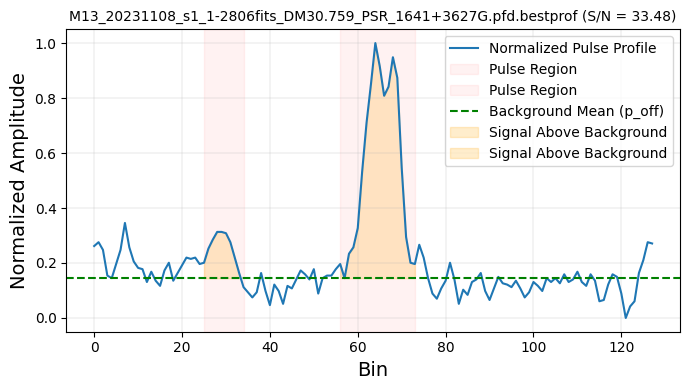

In [236]:
filepath = file_names[0]

# Read the content of the file
with open(filepath, 'r') as f:
    lines = f.readlines()
# Extract the profile data (There are 128 lines of pulse profile data after "#####")
profile_data = []
start_reading = False
for line in lines:
    if line.strip().startswith("#####"):
        start_reading = True
        continue
    if start_reading:
        idx, val = line.strip().split()
        profile_data.append(float(val))
# Convert to a numpy array
profile = np.array(profile_data)
nbins = len(profile)
# Assume you already have the original profile data
# profile = np.array([...])
# Shift the peak to the center
peak_bin = np.argmax(profile)
shift = nbins // 2 - peak_bin
profile_aligned = np.roll(profile, shift)
# Simple normalization: Set the minimum value to zero and the maximum value to one.
profile_min = np.min(profile_aligned)
profile_max = np.max(profile_aligned)
profile_normalized = (profile_aligned - profile_min) / (profile_max - profile_min)
# Define multiple pulse regions (example)
pulse_regions = [(56, 73), (25, 34)]  # Suppose there are two pulse regions
# Create the mask for the pulse regions
pulse_mask = np.zeros(nbins, dtype=bool)
for region in pulse_regions:
    pulse_mask[region[0]:region[1]+1] = True
# The off-pulse region
off_pulse_bins = profile_normalized[~pulse_mask]
# Calculate the background mean and standard deviation (calculated together for all off-pulse regions)
p_off = np.mean(off_pulse_bins)
sigma_p = np.std(off_pulse_bins)
# Initialize the total equivalent width
total_Weq = 0
# Visualize the combined graph
plt.figure(figsize=(7, 4))
# Plot the normalized pulse profile
plt.plot(profile_normalized, drawstyle='default', label='Normalized Pulse Profile')
# Mark all the pulse regions
for region in pulse_regions:
    plt.axvspan(region[0], region[1], color='red', alpha=0.05, label='Pulse Region')
# Mark the background mean p_off line
plt.axhline(p_off, color='green', linestyle='--', label='Background Mean (p_off)')
# Calculate the Weq for each pulse region
for region in pulse_regions:
    pulse_region_data = profile_normalized[region[0]:region[1]+1]
    # Calculate the area of the positive part within the pulse region (equivalent width Weq)
    Weq = np.sum(pulse_region_data[pulse_region_data > p_off]) / np.max(pulse_region_data)
    total_Weq += Weq
    # Fill only the part within the pulse region that is above the background mean
    plt.fill_between(range(region[0], region[1]+1), profile_normalized[region[0]:region[1]+1], p_off,
                     where=(profile_normalized[region[0]:region[1]+1] > p_off), color='orange', alpha=0.2,
                     label="Signal Above Background")

print(f"Total Equivalent Width (Weq): {total_Weq:.2f} bins")
# Calculate the total SNR, based on the total equivalent width and the background mean
SNR = np.sum(profile_normalized[pulse_mask] - p_off) / (sigma_p * np.sqrt(total_Weq))
# SNR = (1 / (sigma_p * np.sqrt(total_Weq))) * np.sum(pulse_region_data - p_off)
print(f"S/N: {SNR:.2f}")
# Use the file name as the title
file_name = filepath.split('\\')[-1]  # Extract the file name from the file path
plt.title(f"{file_name} (S/N = {SNR:.2f})", fontsize=10)
plt.xlabel("Bin", fontsize=14)
plt.ylabel("Normalized Amplitude", fontsize=14)
plt.legend()
plt.grid(True, linewidth=0.2)
plt.tight_layout()
plt.show()